# PART I

# Demographics in Mexico 2020

### INDEX
#### 1. Dependencies and set up  2. Clean data    3. Analysis: By region,By state, By municipality, By location

## 1. Dependencies and set up

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import seaborn as sns
import math
import statistics
import scipy.stats

In [2]:
#Download from: https://www.inegi.org.mx/programas/ccpv/2020/#Datos_abiertos

path_2020 = os.path.join('..', 'demographic info', 'conjunto_de_datos_iter_00CSV20.csv')

In [3]:
demographic_mxn_2020= pd.read_csv(path_2020,low_memory=False,encoding='utf-8-sig')

#note: use utf-8-sig beacuse of spanish characters
#https://datascience.stackexchange.com/questions/12343/pandas-read-csv-with-spanish-characters

## 2. Clean data

#### The dataset contains 232 columns and 3.2 millions rows which contain information of Mexico's demographic census 2020. The dataset includes information by  state, municipality and location; geolocation, by age, by gender, religion, marital status, migration, unemployment, health insutance, household and education

In [4]:
demographic_mxn_2020.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,...,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
1,0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,...,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
2,0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,...,25581,5027,11306,971,708,8247,10065,29741,5283,*
3,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,...,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
4,1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,...,732,205,212,48,41,39,62,530,20,*


##### 2.1 DROP COLUMNS

#### Columns that have aggregated data will not be included, 63 columns will be excluded

In [5]:

#drop columns that we will not use
simple_df=demographic_mxn_2020.drop(demographic_mxn_2020.columns[[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,52,53,54,55,56,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,140,141,142,187,188]],axis=1)


In [6]:
simple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195662 entries, 0 to 195661
Columns: 169 entries, ENTIDAD to TAMLOC
dtypes: int64(6), object(163)
memory usage: 252.3+ MB


####  2.2 CLEAN DATA

In [7]:
#clean data
clean_df = simple_df.replace("*", 0)
clean_df_II = clean_df.replace('N/D', 0)

In [9]:
#list(clean_df_II.columns)

#### 2.3 CLEAN DUPLICATES

In [10]:
#CLEAN for duplicates

#Method example:https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
#df.drop(df[df['Age'] < 25].index, inplace = True)
# Filter all rows for which :

clean_df_II.drop(clean_df_II[clean_df_II["NOM_ENT"]== "Total nacional"].index,inplace=True)
clean_df_II.drop(clean_df_II[clean_df_II["NOM_LOC"]== "Total de la Entidad"].index,inplace=True)
clean_df_II.drop(clean_df_II[clean_df_II["NOM_LOC"]== "Localidades de una vivienda"].index,inplace=True)
clean_df_II.drop(clean_df_II[clean_df_II["NOM_LOC"]== "Localidades de dos viviendas"].index,inplace=True)
clean_df_II.drop(clean_df_II[clean_df_II["NOM_LOC"]== "Total del Municipio"].index,inplace=True)

#clean_df_II.head()


In [11]:
#clean_df_II["NOM_ENT"].unique()


#### 2.4 CONCATANATE TWO COLUMNS  MUNICIPALITY LEVEL

#### Concatanate name of state and municipality because there are a lot of municiplities that have the same name, therefore its harder to identify them. Example, Municipality San Miguel (state Queretaro), San Miguel (state Chiapas),etc


In [18]:
# method: https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
#example:df["period"] = df["Year"].astype(str) + df["quarter"]

clean_df_II["NOM_ENT_MUN"]=clean_df_II["NOM_ENT"].astype(str)+ " , " +clean_df_II["NOM_MUN"].astype(str)
clean_df_II.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189432 entries, 7 to 195660
Columns: 171 entries, ENTIDAD to NOM_ENT_MUN_LOC
dtypes: int64(6), object(165)
memory usage: 248.6+ MB


In [21]:
num_municipality=clean_df_II["NOM_ENT_MUN"].unique()
len(num_municipality)

2467

#### 2.5 CONCAT LOCAL LEVEL

In [14]:
clean_df_II["NOM_ENT_MUN_LOC"]=clean_df_II["NOM_ENT_MUN"].astype(str)+ " , " +clean_df_II["NOM_LOC"].astype(str)

In [15]:
#clean_df_II["NOM_ENT_MUN_LOC"].unique()

In [16]:
clean_df_II["NOM_ENT_MUN_LOC"].count()

189432

In [22]:
#dictionary, not used

#categories_regiones={"Aguascalientes":"CENTRO NORTE","Baja California":"NORTE","Baja California Sur":"CENTRO NORTE",
#            "Campeche":"SUR","Chiapas":"SUR","Chihuahua":"NORTE","Ciudad de M√©xico":"CENTRO", "Coahuila de Zaragoza":"NORTE",
#            "Colima":"CENTRO NORTE","Durango":"CENTRO NORTE","Guanajuato":"CENTRO", "Guerrero":"CENTRO", "Hidalgo":"SUR",
#            "Jalisco":"CENTRO", "Michoac√°n de Ocampo":"CENTRO NORTE","Morelos":"CENTRO NORTE","M√©xico":"CENTRO",
#            "Nayarit":"CENTRO NORTE","Nuevo Le√≥n":"NORTE","Oaxaca":"SUR","Puebla":"CENTRO","Quer√©taro":"CENTRO",
#            "Quintana Roo":"SUR","San Luis Potos√≠":"CENTRO NORTE","Sinaloa":"CENTRO NORTE","Sonora":"NORTE",
#            "Tabasco":"SUR","Tamaulipas":"NORTE","Tlaxcala":"CENTRO","Veracruz de Ignacio de la Llave":"SUR",
#            "Yucat√°n":"SUR","Zacatecas":"CENTRO NORTE"}

#### 2.6 ADD REGION

####  There are 32 states. BANXICO ( Central Mexican Bank) divided the states by geography and economic indicators.

In [23]:
#Add name of region
#Method:https://www.youtube.com/watch?v=5hHW-g0uSUA

#import datframe regiones
path_regiones = os.path.join('..', 'demographic info', '2_regiones.csv')
regiones= pd.read_csv(path_regiones)

#merge
df_merge_regiones=clean_df_II.merge(regiones,on="NOM_ENT",how="left")
df_merge_regiones.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC,NOM_ENT_MUN,NOM_ENT_MUN_LOC,REGION
0,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,"102°17'45.768"" W","21°52'47.362"" N",1878,863893,...,77719,53589,2995,5984,63661,595,13,"Aguascalientes , Aguascalientes","Aguascalientes , Aguascalientes , Aguascalientes",CENTRO NORTE
1,1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,"102°22'24.710"" W","21°52'18.749"" N",1902,5,...,0,0,0,0,0,0,1,"Aguascalientes , Aguascalientes","Aguascalientes , Aguascalientes , Granja Adelita",CENTRO NORTE
2,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,"102°21'25.639"" W","21°53'01.522"" N",1861,41,...,2,1,0,1,6,0,1,"Aguascalientes , Aguascalientes","Aguascalientes , Aguascalientes , Agua Azul",CENTRO NORTE
3,1,Aguascalientes,1,Aguascalientes,102,Los Arbolitos [Rancho],"102°21'26.261"" W","21°46'48.650"" N",1861,8,...,0,0,0,0,0,0,1,"Aguascalientes , Aguascalientes","Aguascalientes , Aguascalientes , Los Arbolito...",CENTRO NORTE
4,1,Aguascalientes,1,Aguascalientes,104,Ardillas de Abajo (Las Ardillas),"102°11'30.914"" W","21°56'42.243"" N",1989,1,...,0,0,0,0,0,0,1,"Aguascalientes , Aguascalientes","Aguascalientes , Aguascalientes , Ardillas de ...",CENTRO NORTE


#### 2.7 REARRANGE COLUMNS

In [24]:
df_semifinal=df_merge_regiones[["REGION","NOM_ENT_MUN",'ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','NOM_LOC',"NOM_ENT_MUN_LOC",'LONGITUD','LATITUD',
 'ALTITUD','POBTOT','POBFEM','POBMAS','P_0A2','P_0A2_F','P_0A2_M','P_3A5','P_3A5_F','P_3A5_M',
 'P_6A11','P_6A11_F','P_6A11_M', 'P_8A14','P_8A14_F','P_8A14_M','P_12A14','P_12A14_F',
 'P_12A14_M','P_15A17', 'P_15A17_F', 'P_15A17_M', 'P_18A24', 'P_18A24_F','P_18A24_M','P_15A49_F', 'P_60YMAS', 'P_60YMAS_F',
 'P_60YMAS_M','PNACENT','PNACENT_F','PNACENT_M','PNACOE','PNACOE_F','PNACOE_M','P3A5_NOA','P3A5_NOA_F','P3A5_NOA_M','P6A11_NOA','P6A11_NOAF','P6A11_NOAM',
 'P12A14NOA','P12A14NOAF','P12A14NOAM','P15A17A','P15A17A_F','P15A17A_M','P18A24A','P18A24A_F','P18A24A_M','P8A14AN','P8A14AN_F','P8A14AN_M','P15YM_AN','P15YM_AN_F','P15YM_AN_M',
 'P15YM_SE', 'P15YM_SE_F', 'P15YM_SE_M','P15PRI_IN','P15PRI_INF','P15PRI_INM','P15PRI_CO','P15PRI_COF','P15PRI_COM',
 'P15SEC_IN','P15SEC_INF','P15SEC_INM','P15SEC_CO','P15SEC_COF','P15SEC_COM','P18YM_PB','P18YM_PB_F','P18YM_PB_M',
 'PEA','PEA_F','PEA_M','PE_INAC','PE_INAC_F','PE_INAC_M','POCUPADA','POCUPADA_F','POCUPADA_M','PDESOCUP',
 'PDESOCUP_F','PDESOCUP_M','PSINDER','PDER_SS','PDER_IMSS','PDER_ISTE','PDER_ISTEE','PAFIL_PDOM','PDER_SEGP',
 'PDER_IMSSB','PAFIL_IPRIV','PAFIL_OTRAI','P12YM_SOLT','P12YM_CASA','P12YM_SEPA','PCATOLICA','PRO_CRIEVA','POTRAS_REL',
 'PSIN_RELIG','TOTHOG','HOGJEF_F','HOGJEF_M','POBHOG','PHOGJEF_F','PHOGJEF_M','VIVTOT','TVIVHAB','TVIVPAR','VIVPAR_HAB',
 'VIVPARH_CV','TVIVPARHAB','VIVPAR_DES','VIVPAR_UT','OCUPVIVPAR','VPH_PISODT','VPH_PISOTI','VPH_1DOR','VPH_2YMASD',
 'VPH_1CUART','VPH_2CUART','VPH_3YMASC','VPH_C_ELEC','VPH_S_ELEC','VPH_AGUADV','VPH_AEASP','VPH_AGUAFV','VPH_TINACO',
 'VPH_CISTER','VPH_EXCSA','VPH_LETR','VPH_DRENAJ','VPH_NODREN','VPH_C_SERV','VPH_NDEAED','VPH_DSADMA','VPH_NDACMM',
 'VPH_SNBIEN','VPH_REFRI','VPH_LAVAD','VPH_HMICRO','VPH_AUTOM','VPH_MOTO','VPH_BICI','VPH_RADIO','VPH_TV','VPH_PC',
 'VPH_TELEF','VPH_CEL','VPH_INTER','VPH_STVP','VPH_SPMVPI','VPH_CVJ','VPH_SINRTV','VPH_SINLTC','VPH_SINCINT',
 'VPH_SINTIC','TAMLOC']]

#df_semifinal.head()

#### 2.8 change datatypes

In [25]:
#CHANGE DATATYPE

# columns that will not be change the data type
cols = df_semifinal.columns.drop(['REGION','NOM_ENT_MUN','ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','NOM_LOC',"NOM_ENT_MUN_LOC",'LONGITUD','LATITUD','ALTITUD'])

#change to numeric instead of string
df_semifinal[cols] = df_semifinal[cols].apply(pd.to_numeric)


In [206]:
df_semifinal.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189432 entries, 0 to 189431
Data columns (total 172 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   REGION           189432 non-null  object
 1   NOM_ENT_MUN      189432 non-null  object
 2   ENTIDAD          189432 non-null  int64 
 3   NOM_ENT          189432 non-null  object
 4   MUN              189432 non-null  int64 
 5   NOM_MUN          189432 non-null  object
 6   LOC              189432 non-null  int64 
 7   NOM_LOC          189432 non-null  object
 8   NOM_ENT_MUN_LOC  189432 non-null  object
 9   LONGITUD         189432 non-null  object
 10  LATITUD          189432 non-null  object
 11  ALTITUD          189432 non-null  object
 12  POBTOT           189432 non-null  int64 
 13  POBFEM           189432 non-null  int64 
 14  POBMAS           189432 non-null  int64 
 15  P_0A2            189432 non-null  int64 
 16  P_0A2_F          189432 non-null  int64 
 17  P_0A2_M  

# 3 Analysis

## 3.1 By region

#### The analysis will start by region. There are 4 main regions: North, Centre North, Centre, South

In [27]:
# STYLiNG PANDAS  https://pbpython.com/styling-pandas.html

In [64]:
TotalPopulation = df_semifinal['POBTOT'].sum()
TotalPopulationFemales = df_semifinal['POBFEM'].sum()
TotalPopulationMales = df_semifinal['POBMAS'].sum()
TotalPopulation,TotalPopulationFemales,TotalPopulationMales,TotalPopulationFemales-TotalPopulationMales

(126014024, 64382441, 61234104, 3148337)

In [61]:
df_byregion_II= df_semifinal.groupby('REGION',as_index=False).sum()
df_byregion_II.head()

,REGION,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,CENTRO,484038,1511578,4368094,47718379,24651355,23024947,2032604,1004668,1027936,...,11529953,7301907,5178314,2631172,1676859,438054,962785,5082603,182181,55762
1,CENTRO NORTE,848990,1674965,20092214,26591884,13496903,12965621,1283089,634216,648873,...,6596933,3887337,3720564,1409434,909729,272648,492919,3062026,107805,65569
2,NORTE,594014,989923,33631798,22914677,11457436,11351297,1007683,497278,510405,...,6265206,4227269,3276472,1759453,1069056,203699,304467,2211144,65547,45570
3,SUR,1243144,6906681,26643000,28789084,14776747,13892239,1423387,704113,719274,...,6311220,2877268,3005669,813379,389635,853129,1386515,4671397,484901,96375


In [62]:
#adding percentage of population vs. total population

df_byregion_II["%TOTALPOP"]=df_byregion_II["POBTOT"]/TotalPopulation
df_byregion_II["%TOTALFEM"]=df_byregion_II["POBFEM"]/TotalPopulation
df_byregion_II["%TOTALMAS"]=df_byregion_II["POBMAS"]/TotalPopulation
#df_byregion_II

### 4.1.1 by gender

In [63]:
Per_fem_OverPop= TotalPopulationFemales/TotalPopulation
Per_mas_OverPop= TotalPopulationMales/TotalPopulation
Per_fem_OverPop,Per_mas_OverPop,Per_fem_OverPop-Per_mas_OverPop

(0.5109148883302068, 0.4859308675040803, 0.024984020826126496)

In [54]:
df_byregion_II_summary=df_byregion_II[["REGION",'POBTOT',"POBFEM","POBMAS"]]
df_byregion_II_summary.style.format({"POBTOT": "{:,}", 
                          "POBFEM": "{:,}", 
                          "POBMAS": "{:,}"})


,REGION,POBTOT,POBFEM,POBMAS
0,CENTRO,"47,718,379","24,651,355","23,024,947"
1,CENTRO NORTE,"26,591,884","13,496,903","12,965,621"
2,NORTE,"22,914,677","11,457,436","11,351,297"
3,SUR,"28,789,084","14,776,747","13,892,239"


In [55]:
##  2graph !!!!!!!!!!!!!!!!!!!!!!!!!!!
#https://www.python-graph-gallery.com/treemap/
#https://towardsdatascience.com/marimekko-charts-with-pythons-matplotlib-6b9784ae73a1

In [65]:
# % over total population
df_byregion_II[["REGION","%TOTALPOP","%TOTALFEM","%TOTALMAS"]].style.format({"%TOTALPOP": "{:.2%}", 
                          "%TOTALFEM": "{:.2%}", 
                          "%TOTALMAS": "{:.2%}"})

,REGION,%TOTALPOP,%TOTALFEM,%TOTALMAS
0,CENTRO,37.87%,19.56%,18.27%
1,CENTRO NORTE,21.10%,10.71%,10.29%
2,NORTE,18.18%,9.09%,9.01%
3,SUR,22.85%,11.73%,11.02%


In [69]:
##  3graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

In [70]:

# adding 5 of population vs total population of the region
df_byregion_II["%FEM_REGION"]=df_byregion_II["POBFEM"]/df_byregion_II["POBTOT"]
df_byregion_II["%MAS_REGION"]=df_byregion_II["POBMAS"]/df_byregion_II["POBTOT"]


In [72]:
# % sobre region mas + fem = tot por cada region, lueog diferencia (tabla 1)
df_byregion_II[["REGION","%FEM_REGION","%MAS_REGION"]].style.format({"%FEM_REGION":"{:.4%}","%MAS_REGION": "{:.4%}"})

,REGION,%FEM_REGION,%MAS_REGION
0,CENTRO,51.6601%,48.2517%
1,CENTRO NORTE,50.7557%,48.7578%
2,NORTE,50.0004%,49.5372%
3,SUR,51.3276%,48.2552%


In [ ]:
##  4graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

### 4.1. 2 By age

In [73]:
# edad y region (tabla 2 y transpose)
df_bygender= df_semifinal.groupby('REGION',as_index=False).sum()
df_bygender

,REGION,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,CENTRO,484038,1511578,4368094,47718379,24651355,23024947,2032604,1004668,1027936,...,11529953,7301907,5178314,2631172,1676859,438054,962785,5082603,182181,55762
1,CENTRO NORTE,848990,1674965,20092214,26591884,13496903,12965621,1283089,634216,648873,...,6596933,3887337,3720564,1409434,909729,272648,492919,3062026,107805,65569
2,NORTE,594014,989923,33631798,22914677,11457436,11351297,1007683,497278,510405,...,6265206,4227269,3276472,1759453,1069056,203699,304467,2211144,65547,45570
3,SUR,1243144,6906681,26643000,28789084,14776747,13892239,1423387,704113,719274,...,6311220,2877268,3005669,813379,389635,853129,1386515,4671397,484901,96375


In [74]:
# backsolve population from ages 25 a 59
df_bygender["P_25A59"]=df_bygender["POBTOT"]-df_bygender["P_0A2"]-df_bygender["P_3A5"]-df_bygender["P_6A11"]-df_bygender["P_12A14"]-df_bygender["P_15A17"]-df_bygender["P_18A24"]-df_bygender["P_60YMAS"]


### 4.1. 3 By age and gender

In [220]:
#traspose
df_bygender[["REGION","POBTOT",'P_0A2','P_3A5','P_6A11','P_12A14','P_15A17','P_18A24',"P_25A59",'P_60YMAS']].transpose()

,0,1,2,3
REGION,CENTRO,CENTRO NORTE,NORTE,SUR
POBTOT,47718379,26591884,22914677,28789084
P_0A2,2032604,1283089,1007683,1423387
P_3A5,2297538,1408916,1153537,1584293
P_6A11,4649263,2817743,2284409,3200503
P_12A14,2395987,1393756,1155976,1579052
P_15A17,2422254,1378301,1134537,1540221
P_18A24,5580721,3124641,2737217,3249341
P_25A59,22464020,11967877,10872761,12790082
P_60YMAS,5875992,3217561,2568557,3422205


In [79]:
##  5graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

#### by age % over nation

In [80]:
# por edad % sobre nacional

df_bygender["%NAC_P_0A2"]=df_bygender["P_0A2"]/TotalPopulation
df_bygender["%NAC_P_3A5"]=df_bygender["P_3A5"]/TotalPopulation
df_bygender["%NAC_P_6A11"]=df_bygender["P_6A11"]/TotalPopulation
df_bygender["%NAC_P_12A14"]=df_bygender["P_12A14"]/TotalPopulation
df_bygender["%NAC_P_15A17"]=df_bygender["P_15A17"]/TotalPopulation
df_bygender["%NAC_P_18A24"]=df_bygender["P_18A24"]/TotalPopulation
df_bygender["%NAC_P_25A59"]=df_bygender["P_25A59"]/TotalPopulation
df_bygender["%NAC_P_60YMAS"]=df_bygender["P_60YMAS"]/TotalPopulation

In [81]:
df_bygender[["REGION",'%NAC_P_0A2','%NAC_P_3A5','%NAC_P_6A11','%NAC_P_12A14','%NAC_P_15A17','%NAC_P_18A24',"%NAC_P_25A59",'%NAC_P_60YMAS']].transpose()

,0,1,2,3
REGION,CENTRO,CENTRO NORTE,NORTE,SUR
%NAC_P_0A2,0.02,0.01,0.01,0.01
%NAC_P_3A5,0.02,0.01,0.01,0.01
%NAC_P_6A11,0.04,0.02,0.02,0.03
%NAC_P_12A14,0.02,0.01,0.01,0.01
%NAC_P_15A17,0.02,0.01,0.01,0.01
%NAC_P_18A24,0.04,0.02,0.02,0.03
%NAC_P_25A59,0.18,0.09,0.09,0.10
%NAC_P_60YMAS,0.05,0.03,0.02,0.03


In [82]:
##  6graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

#### by age % over region

In [83]:
df_bygender["%REG_P_0A2"]=df_bygender["P_0A2"]/df_bygender["POBTOT"]
df_bygender["%REG_P_3A5"]=df_bygender["P_3A5"]/df_bygender["POBTOT"]
df_bygender["%REG_P_6A11"]=df_bygender["P_6A11"]/df_bygender["POBTOT"]
df_bygender["%REG_P_12A14"]=df_bygender["P_12A14"]/df_bygender["POBTOT"]
df_bygender["%REG_P_15A17"]=df_bygender["P_15A17"]/df_bygender["POBTOT"]
df_bygender["%REG_P_18A24"]=df_bygender["P_18A24"]/df_bygender["POBTOT"]
df_bygender["%REG_P_25A59"]=df_bygender["P_25A59"]/df_bygender["POBTOT"]
df_bygender["%REG_P_60YMAS"]=df_bygender["P_60YMAS"]/df_bygender["POBTOT"]

In [84]:
df_bygender[["REGION",'%REG_P_0A2','%REG_P_3A5','%REG_P_6A11','%REG_P_12A14','%REG_P_15A17','%REG_P_18A24',"%REG_P_25A59",'%REG_P_60YMAS']].transpose()


,0,1,2,3
REGION,CENTRO,CENTRO NORTE,NORTE,SUR
%REG_P_0A2,0.04,0.05,0.04,0.05
%REG_P_3A5,0.05,0.05,0.05,0.06
%REG_P_6A11,0.10,0.11,0.10,0.11
%REG_P_12A14,0.05,0.05,0.05,0.05
%REG_P_15A17,0.05,0.05,0.05,0.05
%REG_P_18A24,0.12,0.12,0.12,0.11
%REG_P_25A59,0.47,0.45,0.47,0.44
%REG_P_60YMAS,0.12,0.12,0.11,0.12


In [ ]:
##  7graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

### 4.1. 2.2 By age and region and gender

In [85]:
df_bygender["P_25A59_F"]=df_bygender["POBFEM"]-df_bygender["P_0A2_F"]-df_bygender["P_3A5_F"]-df_bygender["P_6A11_F"]-df_bygender["P_12A14_F"]-df_bygender["P_15A17_F"]-df_bygender["P_18A24_F"]-df_bygender["P_60YMAS_F"]
df_bygender["P_25A59_M"]=df_bygender["POBMAS"]-df_bygender["P_0A2_M"]-df_bygender["P_3A5_M"]-df_bygender["P_6A11_M"]-df_bygender["P_12A14_M"]-df_bygender["P_15A17_M"]-df_bygender["P_18A24_M"]-df_bygender["P_60YMAS_M"]
#df_bygender[["REGION","P_25A59_F","P_25A59_M"]]

In [86]:
#Femenina
df_bygender[['REGION','P_0A2_F','P_3A5_F','P_6A11_F','P_12A14_F','P_15A17_F','P_18A24_F','P_25A59_F','P_60YMAS_F']].transpose()

,0,1,2,3
REGION,CENTRO,CENTRO NORTE,NORTE,SUR
P_0A2_F,1004668,634216,497278,704113
P_3A5_F,1135093,695889,569497,784288
P_6A11_F,2291488,1387080,1122359,1581172
P_12A14_F,1186665,686300,568365,779908
P_15A17_F,1194423,680126,556076,763588
P_18A24_F,2798573,1568332,1353166,1660644
P_25A59_F,11809486,6135637,5421474,6695801
P_60YMAS_F,3230959,1709323,1369221,1807233


In [ ]:
##  8graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

In [227]:
#Masculina
df_bygender[['REGION','P_0A2_M','P_3A5_M','P_6A11_M','P_12A14_M','P_15A17_M','P_18A24_M','P_25A59_M','P_60YMAS_M']].transpose()

,0,1,2,3
REGION,CENTRO,CENTRO NORTE,NORTE,SUR
P_0A2_M,1027936,648873,510405,719274
P_3A5_M,1162445,713027,584040,800005
P_6A11_M,2357775,1430663,1162050,1619331
P_12A14_M,1209322,707456,587611,799144
P_15A17_M,1227831,698175,578461,776633
P_18A24_M,2782148,1556309,1384051,1588697
P_25A59_M,10612457,5702880,5345343,5974183
P_60YMAS_M,2645033,1508238,1199336,1614972


In [ ]:
##  9graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
##  10graph !!!!!!!!!!!!!!!!!!!!!!!!!!!  dif fem -masc

In [228]:
# checar el error en p25 a 59
# dif  tabla fem - tabla mas

In [229]:
# 1 % de segmento de edad / totpob
# mismo pero fem
#mismo pero mas
#piramide interactiva. (5 años, 10 años)

### 4.1.4 viven en el estado que nacieron

In [87]:
df_byregion_II[["REGION","PNACENT","PNACENT_F","PNACENT_M"]]

,REGION,PNACENT,PNACENT_F,PNACENT_M
0,CENTRO,37130088,19048757,18081331
1,CENTRO NORTE,22605075,11541020,11064055
2,NORTE,17359297,8728079,8631218
3,SUR,25334299,13073455,12260844


In [88]:
df_byregion_II["%_PNACENT"]=df_byregion_II["PNACENT"]/df_byregion_II["POBTOT"]
df_byregion_II["%_PNACENT_F"]=df_byregion_II["PNACENT_F"]/df_byregion_II["POBFEM"]
df_byregion_II["%_PNACENT_M"]=df_byregion_II["PNACENT_M"]/df_byregion_II["POBMAS"]
df_byregion_II[["REGION","%_PNACENT","%_PNACENT_F","%_PNACENT_M"]]

,REGION,%_PNACENT,%_PNACENT_F,%_PNACENT_M
0,CENTRO,0.78,0.77,0.79
1,CENTRO NORTE,0.85,0.86,0.85
2,NORTE,0.76,0.76,0.76
3,SUR,0.88,0.88,0.88


In [89]:
##  11graph !!!!!!!!!!!!!!!!!!!!!!!!!!!  grafica conmbinada


### 4.1.5 estatus marital

In [90]:
df_byregion_II[["REGION","P12YM_SOLT","P12YM_CASA","P12YM_SEPA"]]

,REGION,P12YM_SOLT,P12YM_CASA,P12YM_SEPA
0,CENTRO,13655806,20222594,4723744
1,CENTRO NORTE,7187740,11246322,2432620
2,NORTE,6166637,9920963,2208020
3,SUR,7257903,12452790,2655836


In [91]:
df_byregion_II["SUMA_MARITAL"]=df_byregion_II["P12YM_SOLT"]+df_byregion_II["P12YM_CASA"]+df_byregion_II["P12YM_SEPA"]
df_byregion_II["%_SOLTERO"]=df_byregion_II["P12YM_SOLT"]/df_byregion_II["SUMA_MARITAL"]
df_byregion_II["%_CASADO"]=df_byregion_II["P12YM_CASA"]/df_byregion_II["SUMA_MARITAL"]
df_byregion_II["%_SEPARADO"]=df_byregion_II["P12YM_SEPA"]/df_byregion_II["SUMA_MARITAL"]

df_byregion_II[["REGION","SUMA_MARITAL","%_SOLTERO","%_CASADO","%_SEPARADO"]]

,REGION,SUMA_MARITAL,%_SOLTERO,%_CASADO,%_SEPARADO
0,CENTRO,38602144,0.35,0.52,0.12
1,CENTRO NORTE,20866682,0.34,0.54,0.12
2,NORTE,18295620,0.34,0.54,0.12
3,SUR,22366529,0.32,0.56,0.12


In [ ]:
##  12graph !!!!!!!!!!!!!!!!!!!!!!!!!!!  grafica conmbinada

### 4.1.6 religion

In [235]:
df_byregion_II[["REGION","PCATOLICA","PRO_CRIEVA","POTRAS_REL","PSIN_RELIG"]]

,REGION,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG
0,CENTRO,38509562,3620507,148496,5238970
1,CENTRO NORTE,22870926,1685632,37901,1756052
2,NORTE,16470031,3136855,20414,3081254
3,SUR,19713858,5605958,39566,3192164


In [236]:
df_byregion_II["SUMA_RELIGION"]=df_byregion_II["PCATOLICA"]+df_byregion_II["PRO_CRIEVA"]+df_byregion_II["POTRAS_REL"]+df_byregion_II["PSIN_RELIG"]
df_byregion_II["%_CATOLICO"]=df_byregion_II["PCATOLICA"]/df_byregion_II["SUMA_RELIGION"]
df_byregion_II["%_CRISTIANO"]=df_byregion_II["PRO_CRIEVA"]/df_byregion_II["SUMA_RELIGION"]
df_byregion_II["%_OTRAS"]=df_byregion_II["POTRAS_REL"]/df_byregion_II["SUMA_RELIGION"]
df_byregion_II["%_SIN_RELIGION"]=df_byregion_II["PSIN_RELIG"]/df_byregion_II["SUMA_RELIGION"]

df_byregion_II[["REGION","SUMA_RELIGION","%_CATOLICO","%_CRISTIANO","%_OTRAS","%_SIN_RELIGION"]]

,REGION,SUMA_RELIGION,%_CATOLICO,%_CRISTIANO,%_OTRAS,%_SIN_RELIGION
0,CENTRO,47517535,0.81,0.08,0.00,0.11
1,CENTRO NORTE,26350511,0.87,0.06,0.00,0.07
2,NORTE,22708554,0.73,0.14,0.00,0.14
3,SUR,28551546,0.69,0.20,0.00,0.11


In [92]:
##  13graph !!!!!!!!!!!!!!!!!!!!!!!!!!!  grafica conmbinada

### 4.1.9 vivienda

# 4.2 By state

#### 32 states


In [94]:
df_bystate= df_semifinal.groupby('NOM_ENT',as_index=False).sum()
df_bystate.head()

,NOM_ENT,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,Aguascalientes,2022,9542,1113510,1425607,726401,692488,71580,35469,36111,...,358693,235652,173721,98641,70047,5957,15217,128136,1680,2687
1,Baja California,11090,13925,13883144,3769020,1862306,1891882,149408,73721,75687,...,1076100,798977,616133,383603,216559,40724,38350,290571,9432,6254
2,Baja California Sur,7629,8972,3656517,798447,389564,401140,35706,17700,18006,...,224662,148440,135413,67899,36161,14096,8206,75244,2450,2755
3,Campeche,11048,17461,4058343,928363,468301,452686,45116,22278,22838,...,216867,113846,150782,38478,17964,22911,35699,128394,11617,3404
4,Chiapas,148099,1321544,13653445,5543828,2816787,2679013,331499,164627,166872,...,937519,291445,429856,61206,32406,212010,376082,983732,150073,27488


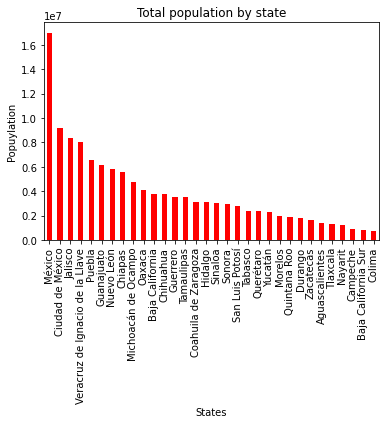

In [111]:
bb = df_semifinal.groupby(["NOM_ENT"]).sum()["POBTOT"]
bb= bb.sort_values(ascending=False)


bb.plot(kind="bar", color="r")

plt.title("Total population by state")
plt.xlabel("States")
plt.ylabel("Popuylation")

plt.show()

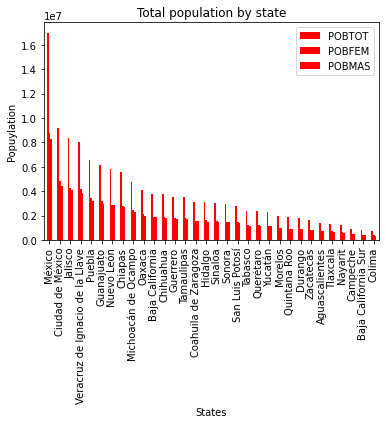

In [97]:
bb = df_semifinal.groupby(["NOM_ENT"]).sum()[["POBTOT", "POBFEM", "POBMAS"]]
bb= bb.sort_values(by="POBTOT",ascending=False)


bb.plot(kind="bar", color="r")

plt.title("Total population by state")
plt.xlabel("States")
plt.ylabel("Popuylation")

plt.show()

In [98]:
statistics.harmonic_mean(df_bystate["POBTOT"])


2331469.8531393674

In [99]:
statistics.geometric_mean(df_bystate["POBTOT"])

3013250.214687265

In [100]:
statistics.median(df_bystate["POBTOT"])

3054892.0

In [101]:
statistics.variance(df_bystate["POBTOT"])

10745343610398.0

In [102]:

der=scipy.stats.mode(df_bystate["POBTOT"])
der

ModeResult(mode=array([731391]), count=array([1]))

In [103]:
scipy.stats.skew(df_bystate["POBTOT"], bias=False)

2.3142865057874165

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='POBTOT', ylabel='Density'>

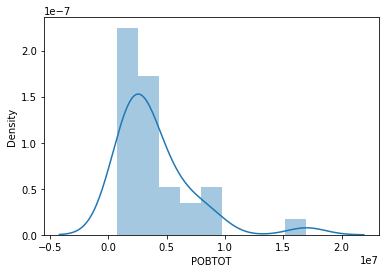

In [104]:
#dist plot
sns.distplot(df_bystate.POBTOT)

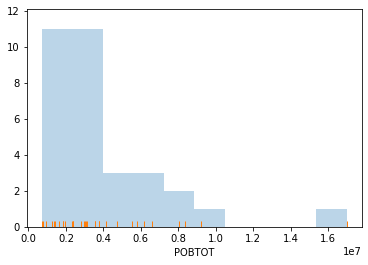

In [106]:
#dist plot
plt.hist(df_bystate.POBTOT, alpha=.3)
sns.rugplot(df_bystate.POBTOT);

<AxesSubplot:xlabel='POBTOT', ylabel='Density'>

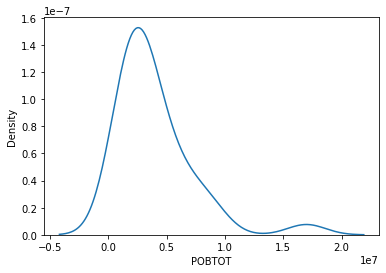

In [105]:
#kde plot
sns.kdeplot(df_bystate.POBTOT)

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='POBTOT'>

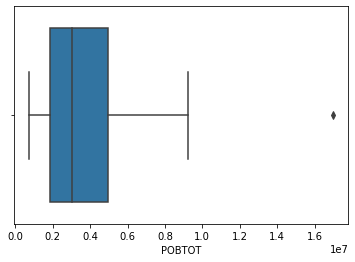

In [107]:
sns.boxplot(df_bystate.POBTOT)

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='POBTOT'>

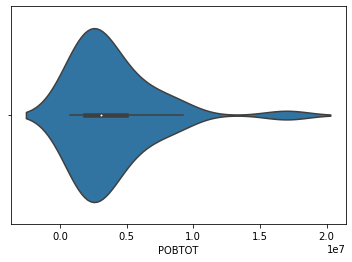

In [108]:
sns.violinplot(df_bystate.POBTOT)

#### 4.1.1 by gender

In [112]:

df_bystate["% TotalPop"]=df_bystate["POBTOT"]/TotalPopulation
df_bystate["%total fem"]=df_bystate["POBFEM"]/TotalPopulation
df_bystate["%total mas"]=df_bystate["POBMAS"]/TotalPopulation

In [115]:
# total population by gender


df_bystate_II=df_semifinal.groupby(["NOM_ENT"]).sum().reset_index()[["NOM_ENT", "POBTOT","POBFEM","POBMAS"]]
df_bystate_II=df_bystate_II[["NOM_ENT",'POBTOT',"POBFEM","POBMAS"]].sort_values(by="POBTOT",ascending=False)

df_bystate_II.describe().style.format({"POBTOT": "{:,}", 
                          "POBFEM": "{:,}", 
                          "POBMAS": "{:,}"})



,POBTOT,POBFEM,POBMAS
count,32.0,32.0,32.0
mean,"3,937,938.25","2,011,951.28125","1,913,565.75"
std,"3,278,009.0924825086","1,692,057.8235794047","1,584,124.6545060778"
min,"731,391.0","369,262.0","358,354.0"
25%,"1,851,651.25","921,019.0","924,009.0"
50%,"3,054,892.0","1,550,256.0","1,479,207.0"
75%,"4,947,591.5","2,531,015.25","2,391,181.0"
max,"16,992,418.0","8,740,213.0","8,245,429.0"


In [114]:
df_bystate_II.style.format({"POBTOT": "{:,}", 
                          "POBFEM": "{:,}", 
                          "POBMAS": "{:,}"})

,NOM_ENT,POBTOT,POBFEM,POBMAS
16,México,"16,992,418","8,740,213","8,245,429"
6,Ciudad de México,"9,209,944","4,804,711","4,404,549"
13,Jalisco,"8,348,151","4,240,415","4,084,207"
29,Veracruz de Ignacio de la Llave,"8,062,579","4,176,106","3,851,050"
20,Puebla,"6,583,278","3,420,346","3,156,828"
10,Guanajuato,"6,166,934","3,163,941","2,984,501"
18,Nuevo León,"5,784,442","2,889,480","2,883,723"
4,Chiapas,"5,543,828","2,816,787","2,679,013"
14,Michoacán de Ocampo,"4,748,846","2,435,758","2,295,237"
19,Oaxaca,"4,132,148","2,152,665","1,969,657"


In [125]:
hm_pobfem=statistics.harmonic_mean(df_bystate["POBFEM"])
hm_pobmas=statistics.harmonic_mean(df_bystate["POBMAS"])
gm_pobfem=statistics.geometric_mean(df_bystate["POBFEM"])
gm_pobmas=statistics.geometric_mean(df_bystate["POBMAS"])

skew_pobfem=scipy.stats.skew(df_bystate["POBFEM"], bias=False)
skew_pobmas=scipy.stats.skew(df_bystate["POBMAS"], bias=False)
#scipy.stats.mode(df_bystate_II["POBTOT"])
#statistics.median(df_bystate_II["POBTOT"])
#statistics.variance(df_bystate_II["POBTOT"])
hm_pobfem,hm_pobmas,gm_pobfem,gm_pobmas,skew_pobfem,skew_pobmas

(1178942.5336980612,
 1140503.4738739089,
 1531680.4695428,
 1469048.2065341577,
 2.3169838494421473,
 2.327087970115513)

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='POBFEM', ylabel='Density'>

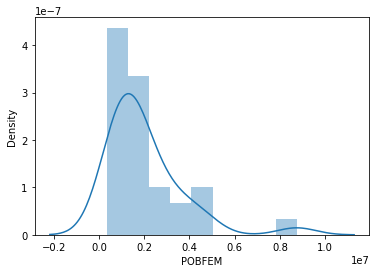

In [126]:
sns.distplot(df_bystate.POBFEM)

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='POBMAS', ylabel='Density'>

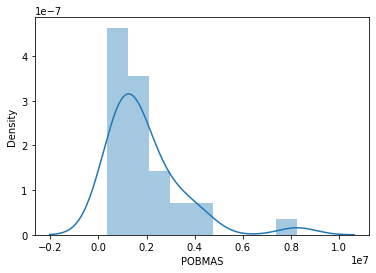

In [127]:
sns.distplot(df_bystate.POBMAS)

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='POBMAS'>

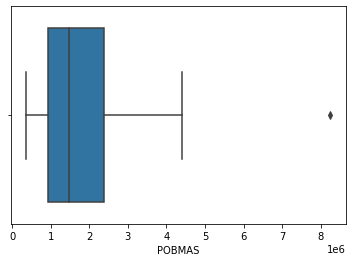

In [128]:
sns.boxplot(df_bystate.POBMAS)

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='POBFEM'>

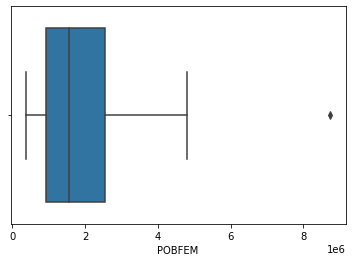

In [129]:
sns.boxplot(df_bystate.POBFEM)

## %  population by gender


In [261]:
#df_bystate.sort_values(by=["%total fem", "%total mas"],ascending=[True, True])

In [132]:
df_per_state= df_bystate[["NOM_ENT","%TOTALPOT","%TOTALFEM","%TOTALMAS"]].sort_values(by="% TOTALPOP",ascending=False)
sns.kdeplot(df_per_state["%TOTALPOP"])

KeyError: "['%TOTALPOT', '%TOTALMAS', '%TOTALFEM'] not in index"

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='% TotalPop'>

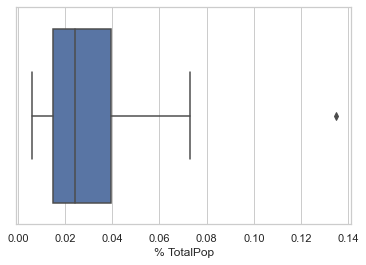

In [264]:
sns.boxplot(df_per_state["% TotalPop"])

In [262]:
# %  populaiton by gender
df_bystate[["NOM_ENT","% TotalPop",'%total fem',"%total mas"]].sort_values(by="% TotalPop",ascending=False)

,NOM_ENT,% TotalPop,%total fem,%total mas
16,México,0.13,0.07,0.07
6,Ciudad de México,0.07,0.04,0.03
13,Jalisco,0.07,0.03,0.03
29,Veracruz de Ignacio de la Llave,0.06,0.03,0.03
20,Puebla,0.05,0.03,0.03
10,Guanajuato,0.05,0.03,0.02
18,Nuevo León,0.05,0.02,0.02
4,Chiapas,0.04,0.02,0.02
14,Michoacán de Ocampo,0.04,0.02,0.02
19,Oaxaca,0.03,0.02,0.02


In [ ]:
# graph !!!!!!

### % over region

In [133]:
df_bystate["%FEM_REGION"]=df_bystate["POBFEM"]/df_bystate["POBTOT"]
df_bystate["%MAS_REGION"]=df_bystate["POBMAS"]/df_bystate["POBTOT"]

In [135]:
df_bystate[["%FEM_REGION","%MAS_REGION"]].describe().style.format({"POBTOT": "{:,}","%MAS_REGION": "{:,}"})

,%FEM_REGION,%MAS_REGION
count,32.00,32.00
mean,0.51,0.49
std,0.01,0.01
min,0.49,0.48
25%,0.50,0.48
50%,0.51,0.49
75%,0.51,0.49
max,0.52,0.50


In [134]:
# backsolve population from ages 25 a 59
df_bystate["P_25A59"]=df_bystate["POBTOT"]-df_bystate["P_0A2"]-df_bystate["P_3A5"]-df_bystate["P_6A11"]-df_bystate["P_12A14"]-df_bystate["P_15A17"]-df_bystate["P_18A24"]-df_bystate["P_60YMAS"]


In [138]:
hm_fem=statistics.harmonic_mean(df_bystate["%FEM_REGION"])
hm_mas=statistics.harmonic_mean(df_bystate["%MAS_REGION"])
gm_fem=statistics.geometric_mean(df_bystate["%FEM_REGION"])
gm_mas=statistics.geometric_mean(df_bystate["%MAS_REGION"])
#statistics.median(df_bystate_II["POBTOT"])
#statistics.variance(df_bystate_II["POBTOT"])
skew_fem=scipy.stats.skew(df_bystate["%FEM_REGION"], bias=False)
skew_mas=scipy.stats.skew(df_bystate["%MAS_REGION"], bias=False)
#scipy.stats.mode(df_bystate_II["POBTOT"])
hm_fem,hm_mas,gm_fem,gm_mas,skew_fem,skew_mas

(0.5082454526642809,
 0.48748052428738275,
 0.5083150619477409,
 0.48752944557132505,
 -0.38795751987895644,
 0.6321080993025988)

<AxesSubplot:ylabel='Density'>

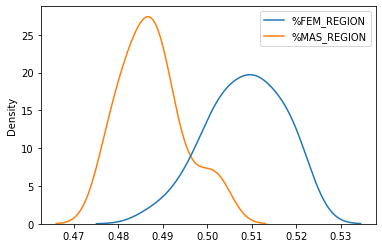

In [139]:
iris = df_bystate[["%FEM_REGION","%MAS_REGION"]]
sns.kdeplot(data=iris)

<AxesSubplot:ylabel='Density'>

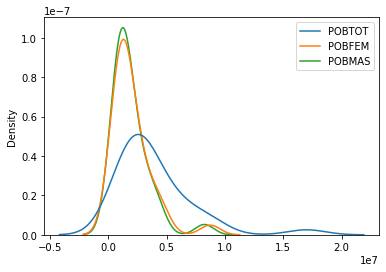

In [140]:
iris_II= df_bystate[["POBTOT","POBFEM","POBMAS"]]
sns.kdeplot(data=iris_II)

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='%FEM_REGION', ylabel='Density'>

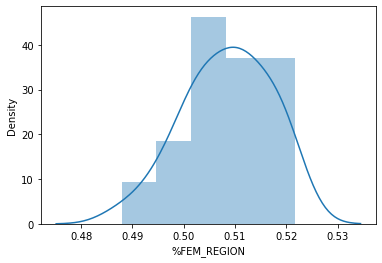

In [141]:
sns.distplot(df_bystate["%FEM_REGION"])

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='%MAS_REGION', ylabel='Density'>

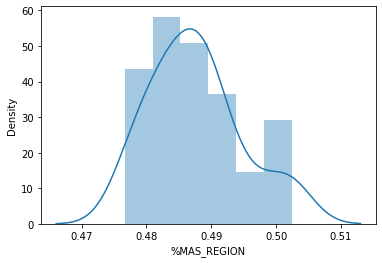

In [142]:
sns.distplot(df_bystate["%MAS_REGION"])

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='%FEM_REGION'>

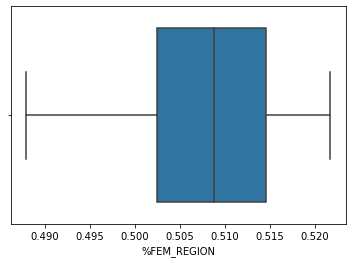

In [143]:
sns.boxplot(df_bystate["%FEM_REGION"])

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='%MAS_REGION'>

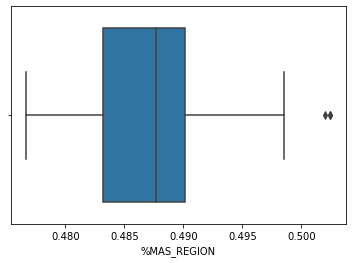

In [144]:
sns.boxplot(df_bystate["%MAS_REGION"])

In [136]:
# % population by gender over population
df_bystate[["NOM_ENT","%FEM_REGION","%MAS_REGION"]].sort_values(by="%FEM_REGION",ascending=False)

,NOM_ENT,%FEM_REGION,%MAS_REGION
6,Ciudad de México,0.52,0.48
19,Oaxaca,0.52,0.48
20,Puebla,0.52,0.48
12,Hidalgo,0.52,0.48
11,Guerrero,0.52,0.48
29,Veracruz de Ignacio de la Llave,0.52,0.48
15,Morelos,0.52,0.48
28,Tlaxcala,0.52,0.48
16,México,0.51,0.49
10,Guanajuato,0.51,0.48


## by age  & GENDER

In [145]:
df_bystate["%NAC_P_0A2"]=df_bystate["P_0A2"]/TotalPopulation
df_bystate["%NAC_P_3A5"]=df_bystate["P_3A5"]/TotalPopulation
df_bystate["%NAC_P_6A11"]=df_bystate["P_6A11"]/TotalPopulation
df_bystate["%NAC_P_12A14"]=df_bystate["P_12A14"]/TotalPopulation
df_bystate["%NAC_P_15A17"]=df_bystate["P_15A17"]/TotalPopulation
df_bystate["%NAC_P_18A24"]=df_bystate["P_18A24"]/TotalPopulation
df_bystate["%NAC_P_25A59"]=df_bystate["P_25A59"]/TotalPopulation
df_bystate["%NAC_P_60YMAS"]=df_bystate["P_60YMAS"]/TotalPopulation

In [150]:
df_bystate[['P_0A2','P_3A5','P_6A11','P_12A14','P_15A17','P_18A24','P_60YMAS']].describe().style.format(
    {"P_0A2": "{:,}", "P_3A5": "{:,}","P_6A11": "{:,}", "P_12A14": "{:,}","P_15A17": "{:,}", "P_18A24": "{:,}", 
                          "P_60YMAS": "{:,}"})

,P_0A2,P_3A5,P_6A11,P_12A14,P_15A17,P_18A24,P_60YMAS
count,32.0,32.0,32.0,32.0,32.0,32.0,32.0
mean,"179,586.34375","201,383.875","404,747.4375","203,899.09375","202,353.53125","459,122.5","471,384.84375"
std,"140,442.5247498201","159,780.01661573892","321,920.12556422484","166,105.0718460786","167,747.14946301392","381,188.2039374996","413,655.9070869683"
min,"29,454.0","34,291.0","72,571.0","35,955.0","36,051.0","83,371.0","73,841.0"
25%,"87,016.0","94,935.25","190,843.5","96,749.0","94,836.25","223,364.5","205,218.5"
50%,"136,244.5","151,858.5","314,439.0","157,296.5","156,349.5","352,882.0","368,068.0"
75%,"252,695.0","272,793.25","532,533.75","257,488.5","252,367.25","577,995.5","561,306.0"
max,"724,070.0","834,553.0","1,682,477.0","880,651.0","887,125.0","2,003,868.0","1,919,048.0"


In [ ]:
# HAY QUE HACER ESTE CON BASE INEGI POR ESTADO

<AxesSubplot:ylabel='Density'>

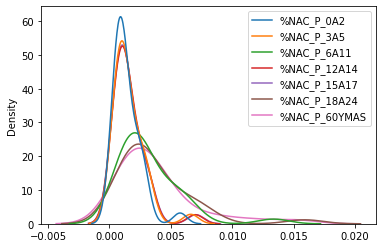

In [146]:
iris_III=df_bystate[['%NAC_P_0A2','%NAC_P_3A5','%NAC_P_6A11','%NAC_P_12A14','%NAC_P_15A17','%NAC_P_18A24','%NAC_P_60YMAS']]

sns.kdeplot(data=iris_III)

<AxesSubplot:ylabel='Density'>

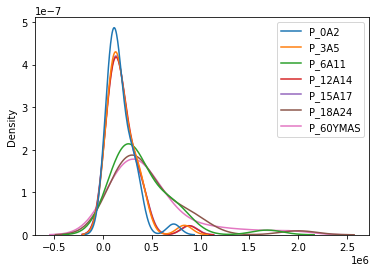

In [147]:
iris_IV=df_bystate[['P_0A2','P_3A5','P_6A11','P_12A14','P_15A17','P_18A24','P_60YMAS']]
sns.kdeplot(data=iris_IV)

<AxesSubplot:ylabel='Density'>

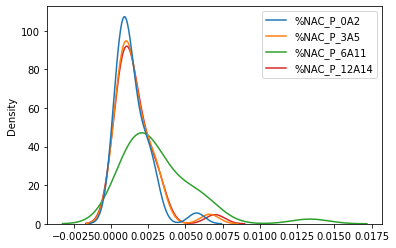

In [148]:
iris_V=df_bystate[['%NAC_P_0A2','%NAC_P_3A5','%NAC_P_6A11','%NAC_P_12A14']]

sns.kdeplot(data=iris_V)

In [304]:
df_bystate[["NOM_ENT","POBTOT",'P_0A2','P_3A5','P_6A11','P_12A14','P_15A17','P_18A24',"P_25A59",'P_60YMAS']].transpose()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
NOM_ENT,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
POBTOT,1425607,3769020,798447,928363,5543828,3741869,9209944,3146771,731391,1832650,...,1857985,2822255,3026943,2944840,2402598,3527735,1342977,8062579,2320898,1622138
P_0A2,71580,149408,35706,45116,331499,162384,267126,159979,29454,95029,...,84202,132259,137835,123617,118233,154476,63852,341268,100946,87954
P_3A5,78551,174712,39622,49720,360654,190018,324908,177277,34291,107087,...,94961,147338,144501,142451,133167,175300,70390,391215,112939,94858
P_6A11,156102,364772,80998,97375,725191,382937,692654,326429,72571,208107,...,186633,292631,302449,298569,269021,358148,141224,811111,223159,184480
P_12A14,77524,186552,39502,47033,339541,199230,367917,158747,35955,99792,...,90677,152097,155333,155846,132718,181230,71912,409886,113238,89309
P_15A17,77810,183014,39347,45435,320933,193738,380774,158188,36051,97734,...,86143,153028,154511,151627,127791,174878,73101,416429,115473,85480
P_18A24,179970,470531,91944,105193,662378,441740,984116,373769,83371,216568,...,225630,331406,358220,347544,269146,402441,161681,860458,279697,184633
P_25A59,639423,1863293,397487,436967,2301695,1756435,4700915,1445733,348687,800795,...,959493,1254098,1382855,1370378,1095274,1658114,615333,3679881,1087452,697164
P_60YMAS,144647,376738,73841,101524,501937,415387,1491534,346649,91011,207538,...,130246,359398,391239,354808,257248,423148,145484,1152331,287994,198260


In [151]:
#df_bystate[["NOM_ENT",'%NAC_P_0A2','%NAC_P_3A5','%NAC_P_6A11','%NAC_P_12A14','%NAC_P_15A17','%NAC_P_18A24',"%NAC_P_25A59",'%NAC_P_60YMAS']].transpose()
#pd.options.display.float_format = "{:,.5f}".format
#df_bystate[["NOM_ENT",'%NAC_P_0A2','%NAC_P_3A5','%NAC_P_6A11','%NAC_P_12A14','%NAC_P_15A17','%NAC_P_18A24',"%NAC_P_25A59",'%NAC_P_60YMAS']]


In [152]:
df_bystate["%REG_P_0A2"]=df_bystate["P_0A2"]/df_bystate["POBTOT"]
df_bystate["%REG_P_3A5"]=df_bystate["P_3A5"]/df_bystate["POBTOT"]
df_bystate["%REG_P_6A11"]=df_bystate["P_6A11"]/df_bystate["POBTOT"]
df_bystate["%REG_P_12A14"]=df_bystate["P_12A14"]/df_bystate["POBTOT"]
df_bystate["%REG_P_15A17"]=df_bystate["P_15A17"]/df_bystate["POBTOT"]
df_bystate["%REG_P_18A24"]=df_bystate["P_18A24"]/df_bystate["POBTOT"]
df_bystate["%REG_P_25A59"]=df_bystate["P_25A59"]/df_bystate["POBTOT"]
df_bystate["%REG_P_60YMAS"]=df_bystate["P_60YMAS"]/df_bystate["POBTOT"]

In [153]:
#df_bystate[["NOM_ENT",'%REG_P_0A2','%REG_P_3A5','%REG_P_6A11','%REG_P_12A14','%REG_P_15A17','%REG_P_18A24',"%REG_P_25A59",'%REG_P_60YMAS']]

In [126]:
df_bystate["P_25A59_F"]=df_bystate["POBFEM"]-df_bystate["P_0A2_F"]-df_bystate["P_3A5_F"]-df_bystate["P_6A11_F"]-df_bystate["P_12A14_F"]-df_bystate["P_15A17_F"]-df_bystate["P_18A24_F"]-df_bystate["P_60YMAS_F"]
df_bystate["P_25A59_M"]=df_bystate["POBMAS"]-df_bystate["P_0A2_M"]-df_bystate["P_3A5_M"]-df_bystate["P_6A11_M"]-df_bystate["P_12A14_M"]-df_bystate["P_15A17_M"]-df_bystate["P_18A24_M"]-df_bystate["P_60YMAS_M"]
#df_bystate[["NOM_ENT","P_25A59_F","P_25A59_M"]]

## RESIDENTES

In [130]:
# residents
#df_bystate[["NOM_ENT","PNACENT","PNACENT_F","PNACENT_M"]]

In [138]:
df_bystate["%_PNACENT"]=df_bystate["PNACENT"]/df_bystate["POBTOT"]
df_bystate["%_PNACENT_F"]=df_bystate["PNACENT_F"]/df_bystate["POBFEM"]
df_bystate["%_PNACENT_M"]=df_bystate["PNACENT_M"]/df_bystate["POBMAS"]
#df_bystate[["NOM_ENT","%_PNACENT","%_PNACENT_F","%_PNACENT_M"]]

# 4.3 by municipality

In [142]:
df_bymun= df_semifinal.groupby('NOM_ENT_MUN',as_index=False).sum()
df_bymun.head()

,NOM_ENT_MUN,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,"Aguascalientes , Aguascalientes",565,565,825183,948990,486138,460305,44297,21854,22443,...,251390,178518,130206,80923,56106,3287,7275,74004,725,704
1,"Aguascalientes , Asientos",172,344,28197,51536,26097,25079,3154,1630,1524,...,10592,4494,3848,590,551,371,1439,7152,176,268
2,"Aguascalientes , Calvillo",166,498,33805,58250,29584,28430,3146,1576,1570,...,13602,6537,4736,1380,1350,436,895,8006,134,236
3,"Aguascalientes , Cosío",64,256,5033,17000,8626,8187,1023,535,488,...,3380,1725,1650,221,190,136,408,1883,49,91
4,"Aguascalientes , El Llano",167,1670,22211,20853,10227,9773,1245,615,630,...,4378,1306,981,242,209,154,629,3450,84,202


In [177]:
des=df_bymun.describe()
des.to_csv("des.csv")

In [150]:
#df_bymun.to_csv('municipios.csv')

In [151]:
# ### 4.1.1 by gender
df_bymun["% TotalPop"]=df_bymun["POBTOT"]/TotalPopulation
df_bymun["%total fem"]=df_bymun["POBFEM"]/TotalPopulation
df_bymun["%total mas"]=df_bymun["POBMAS"]/TotalPopulation

In [152]:
df_bymun_summary=df_bymun[["NOM_ENT_MUN",'POBTOT',"POBFEM","POBMAS"]]
df_bymun_per=df_bymun[["NOM_ENT_MUN","% TotalPop",'%total fem',"%total mas"]]
#df_bymun_summary.to_csv("df_bymun_summary.csv")
#df_bymun_per.to_csv("df_bymun_per.csv")

In [153]:
df_bymun["%FEM_REGION"]=df_bymun["POBFEM"]/df_bymun["POBTOT"]
df_bymun["%MAS_REGION"]=df_bymun["POBMAS"]/df_bymun["POBTOT"]

In [155]:
df_bymun_reg=df_bymun[["NOM_ENT_MUN","%FEM_REGION","%MAS_REGION"]]
#df_bymun_reg.to_csv("df_bymun_reg.csv")

In [157]:
# backsolve population from ages 25 a 59
df_bymun["P_25A59"]=df_bymun["POBTOT"]-df_bymun["P_0A2"]-df_bymun["P_3A5"]-df_bymun["P_6A11"]-df_bymun["P_12A14"]-df_bymun["P_15A17"]-df_bymun["P_18A24"]-df_bymun["P_60YMAS"]


In [158]:
df_bymun_age=df_bymun[["NOM_ENT_MUN","POBTOT",'P_0A2','P_3A5','P_6A11','P_12A14','P_15A17','P_18A24',"P_25A59",'P_60YMAS']]
df_bymun_age.to_csv("df_bymun_age.csv")

In [159]:
df_bymun["%NAC_P_0A2"]=df_bymun["P_0A2"]/TotalPopulation
df_bymun["%NAC_P_3A5"]=df_bymun["P_3A5"]/TotalPopulation
df_bymun["%NAC_P_6A11"]=df_bymun["P_6A11"]/TotalPopulation
df_bymun["%NAC_P_12A14"]=df_bymun["P_12A14"]/TotalPopulation
df_bymun["%NAC_P_15A17"]=df_bymun["P_15A17"]/TotalPopulation
df_bymun["%NAC_P_18A24"]=df_bymun["P_18A24"]/TotalPopulation
df_bymun["%NAC_P_25A59"]=df_bymun["P_25A59"]/TotalPopulation
df_bymun["%NAC_P_60YMAS"]=df_bymun["P_60YMAS"]/TotalPopulation

In [161]:
df_bymun_byageper=df_bymun[["NOM_ENT_MUN",'%NAC_P_0A2','%NAC_P_3A5','%NAC_P_6A11','%NAC_P_12A14','%NAC_P_15A17','%NAC_P_18A24',"%NAC_P_25A59",'%NAC_P_60YMAS']]
#df_bymun_byageper.to_csv("df_bymun_byageper.csv")

In [162]:
df_bymun["%REG_P_0A2"]=df_bymun["P_0A2"]/df_bymun["POBTOT"]
df_bymun["%REG_P_3A5"]=df_bymun["P_3A5"]/df_bymun["POBTOT"]
df_bymun["%REG_P_6A11"]=df_bymun["P_6A11"]/df_bymun["POBTOT"]
df_bymun["%REG_P_12A14"]=df_bymun["P_12A14"]/df_bymun["POBTOT"]
df_bymun["%REG_P_15A17"]=df_bymun["P_15A17"]/df_bymun["POBTOT"]
df_bymun["%REG_P_18A24"]=df_bymun["P_18A24"]/df_bymun["POBTOT"]
df_bymun["%REG_P_25A59"]=df_bymun["P_25A59"]/df_bymun["POBTOT"]
df_bymun["%REG_P_60YMAS"]=df_bymun["P_60YMAS"]/df_bymun["POBTOT"]

In [163]:
df_bymun_byagereg=df_bymun[["NOM_ENT_MUN",'%REG_P_0A2','%REG_P_3A5','%REG_P_6A11','%REG_P_12A14','%REG_P_15A17','%REG_P_18A24',"%REG_P_25A59",'%REG_P_60YMAS']]
df_bymun_byagereg.to_csv("df_bymun_byagereg.csv")

In [165]:
df_bymun["P_25A59_F"]=df_bymun["POBFEM"]-df_bymun["P_0A2_F"]-df_bymun["P_3A5_F"]-df_bymun["P_6A11_F"]-df_bymun["P_12A14_F"]-df_bymun["P_15A17_F"]-df_bymun["P_18A24_F"]-df_bymun["P_60YMAS_F"]
df_bymun["P_25A59_M"]=df_bymun["POBMAS"]-df_bymun["P_0A2_M"]-df_bymun["P_3A5_M"]-df_bymun["P_6A11_M"]-df_bymun["P_12A14_M"]-df_bymun["P_15A17_M"]-df_bymun["P_18A24_M"]-df_bymun["P_60YMAS_M"]
#df_bymun[["NOM_ENT_MUN","P_25A59_F","P_25A59_M"]]

In [170]:
#Femenina
df_bymun_age_fem=df_bymun[['NOM_ENT_MUN','P_0A2_F','P_3A5_F','P_6A11_F','P_12A14_F','P_15A17_F','P_18A24_F','P_25A59_F','P_60YMAS_F']]
#df_bymun_age_fem.to_csv("df_bymun_age_fem.csv")

In [171]:
#Masculina
df_bymun_age_mas=df_bymun[['NOM_ENT_MUN','P_0A2_M','P_3A5_M','P_6A11_M','P_12A14_M','P_15A17_M','P_18A24_M','P_25A59_M','P_60YMAS_M']]
#df_bymun_age_mas.to_csv("df_bymun_age_mas.csv")

In [ ]:
# checar el error en p25 a 59
# dif  tabla fem - tabla mas
# 1 % de segmento de edad / totpob
# mismo pero fem
#mismo pero mas
#piramide interactiva. (5 años, 10 años)

In [173]:
#by resident
df_by_mun_resident=df_bymun[["NOM_ENT_MUN","PNACENT","PNACENT_F","PNACENT_M"]]
df_by_mun_resident.to_csv("df_by_mun_resident.csv")

In [186]:
df_bymun["%_PNACENT"]=df_bymun["PNACENT"]/df_bymun["POBTOT"]
df_bymun["%_PNACENT_F"]=df_bymun["PNACENT_F"]/df_bymun["POBFEM"]
df_bymun["%_PNACENT_M"]=df_bymun["PNACENT_M"]/df_bymun["POBMAS"]
df_by_mun_resident_per=df_bymun[["NOM_ENT_MUN","%_PNACENT","%_PNACENT_F","%_PNACENT_M"]]
#df_by_mun_resident_per.to_csv("df_by_mun_resident_per.csv")

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='POBTOT', ylabel='Density'>

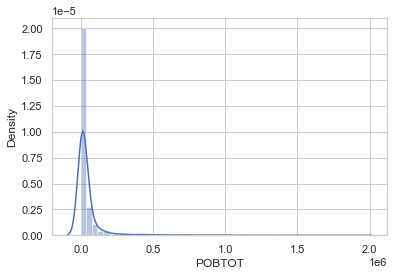

In [179]:
sns.distplot(df_bymun.POBTOT)

<AxesSubplot:xlabel='POBTOT', ylabel='Density'>

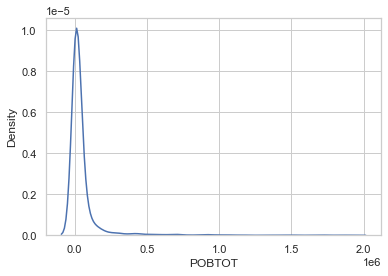

In [180]:
sns.kdeplot(df_bymun.POBTOT)

(array([2.342e+03, 5.400e+01, 3.000e+01, 1.600e+01, 1.000e+01, 6.000e+00,
        1.000e+00, 3.000e+00, 3.000e+00, 2.000e+00]),
 array([8.1000000e+01, 1.9232520e+05, 3.8456940e+05, 5.7681360e+05,
        7.6905780e+05, 9.6130200e+05, 1.1535462e+06, 1.3457904e+06,
        1.5380346e+06, 1.7302788e+06, 1.9225230e+06]),
 <BarContainer object of 10 artists>)

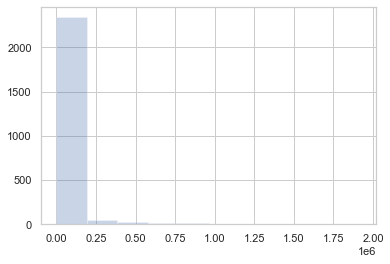

In [182]:
plt.hist(df_bymun.POBTOT, alpha=.3)


/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='POBTOT'>

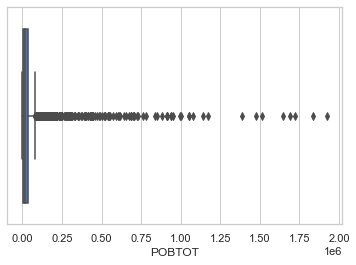

In [184]:
sns.boxplot(df_bymun.POBTOT)



/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='POBTOT'>

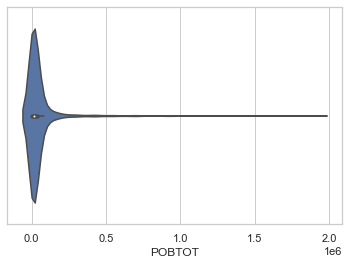

In [185]:
sns.violinplot(df_bymun.POBTOT)

In [ ]:
df_by_mun_resident_per